In [1]:
# Importing all Necessery library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve

In [3]:
# Load the given dataset Ionosphere 

In [4]:
data= pd.read_csv('Ionosphere.csv')
data.head()        

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1


In [5]:
# check the information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      351 non-null    int64  
 1   V2      351 non-null    int64  
 2   V3      351 non-null    float64
 3   V4      351 non-null    float64
 4   V5      351 non-null    float64
 5   V6      351 non-null    float64
 6   V7      351 non-null    float64
 7   V8      351 non-null    float64
 8   V9      351 non-null    float64
 9   V10     351 non-null    float64
 10  V11     351 non-null    float64
 11  V12     351 non-null    float64
 12  V13     351 non-null    float64
 13  V14     351 non-null    float64
 14  V15     351 non-null    float64
 15  V16     351 non-null    float64
 16  V17     351 non-null    float64
 17  V18     351 non-null    float64
 18  V19     351 non-null    float64
 19  V20     351 non-null    float64
 20  V21     351 non-null    float64
 21  V22     351 non-null    float64
 22  V2

In [6]:
# Checking the statisctical information
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,...,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480,0.641026
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,...,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337,0.480384
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,...,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350,0.000000
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,...,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000,1.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,...,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660,1.000000
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# checkin the null values in the given dataset so i foud there is no null values in the dataset
data.isna().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
V15      0
V16      0
V17      0
V18      0
V19      0
V20      0
V21      0
V22      0
V23      0
V24      0
V25      0
V26      0
V27      0
V28      0
V29      0
V30      0
V31      0
V32      0
V33      0
V34      0
Class    0
dtype: int64

In [8]:
# checking the shape of the dataset i found there is 351 rows and 35 columns
data.shape

(351, 35)

In [9]:
#check unique values in the class Column i found there is only two values (1,0) its a binary
data['Class'].unique()

array([1, 0], dtype=int64)

In [10]:
# checking the counts of the binary values i found 1- 225 times and 0- 126 times
data['Class'].value_counts()

1    225
0    126
Name: Class, dtype: int64

In [11]:
# Feature Extraction : i drop target vriable in X and inclued all Features and in our target variable is y 

In [12]:
X= data.drop('Class',axis=1)
y= data['Class']

In [13]:
# spliting the data X_train,X_test,y_train,y_test 
# i take random state is 25 and stratify is y because we want equal proportion 
# test size is 20%

In [14]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=25, stratify=y)

In [15]:
# I check all the model performance

In [16]:
models=[]
models.append(('Logistic Regression',LogisticRegression()))
models.append(('Decision tree',DecisionTreeClassifier()))
models.append(('KNN',KNeighborsClassifier(n_neighbors=2)))
models.append(('Gaussian',GaussianNB()))
models.append(('XGB',XGBClassifier()))
models.append(('svc',SVC()))

In [17]:
results=[]
names=[]

for name,model in models:
    k_mode= model.fit(X_train,y_train)
    result= model.score(X_test,y_test)
    results.append(name)
    print(result)

0.9154929577464789
0.9014084507042254
0.9295774647887324
0.9154929577464789
[12:23:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9436619718309859
0.971830985915493


C:\Users\asus\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [18]:
# Here in the above results i found our SVC model give me the accuracy of 97% so i go with the svc Model

In [19]:
svc= SVC().fit(X_train,y_train)

In [20]:
svc.score(X_test,y_test)

0.971830985915493

In [21]:
# making prediction

In [22]:
prediction= svc.predict(X_test)

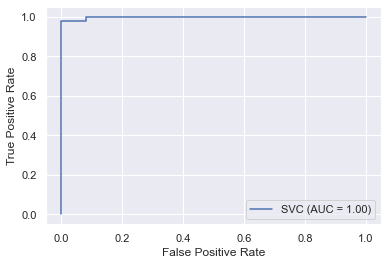

In [23]:
plot_roc_curve(svc, X_test, y_test);

In [24]:
cm=confusion_matrix(y_test,prediction)
print('Confusion metrix')
print(cm)

Confusion metrix
[[24  1]
 [ 1 45]]


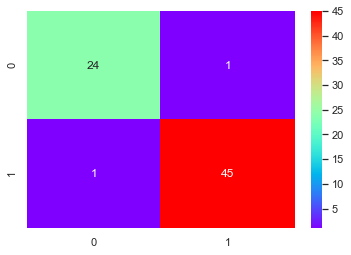

In [25]:
sns.heatmap(cm,annot=True,cmap='rainbow');

In [26]:
clss= classification_report(y_test,prediction)
print('Classification_Report:')
print(clss)

Classification_Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        25
           1       0.98      0.98      0.98        46

    accuracy                           0.97        71
   macro avg       0.97      0.97      0.97        71
weighted avg       0.97      0.97      0.97        71



In [27]:
y_true=y_test.values

In [28]:
df_predicted= pd.DataFrame()
df_predicted['Prediction']=prediction
df_predicted['Y_true']=y_true

In [29]:
# Compare the result with Prediction and our y_test data

In [30]:
df_predicted

,Prediction,Y_true
0,1,1
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
66,1,1
67,1,1
68,1,1
69,1,1


# Conclusion:- The given dataset have target varibale and it is a type of binary class (0,1) its a Supervised machine learning task,after performing varius supervised machine learning models it found svc is most suitable model. hence svc is implimented for prediction.